In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [2]:
data=pd.read_csv('Train_UWu5bXk.txt')

In [3]:
features=data.columns
print(features)
data.head()


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#check for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#EDA 
data=data.drop(labels='Item_Identifier',axis=1)
data=data.drop(labels='Outlet_Identifier',axis=1)

In [6]:
#Itemfatcontent
data.groupby(['Item_Fat_Content']).agg({'Item_Outlet_Sales':sum}).reset_index().iplot(kind='pie',labels='Item_Fat_Content',values='Item_Outlet_Sales',hole=0.1,pull=0.2)

#low fat has maximum sales and then regular

In [7]:
data
data.groupby('Item_Type').agg({'Item_Outlet_Sales':sum}).reset_index().iplot(kind='bar',x='Item_Type',y='Item_Outlet_Sales')

In [8]:
#Outleteastablishment

data.groupby(['Outlet_Establishment_Year']).agg({'Item_Outlet_Sales':sum}).reset_index().iplot(kind='bar',x='Outlet_Establishment_Year',y='Item_Outlet_Sales')


In [9]:
data
data.groupby('Outlet_Size').agg({'Item_Outlet_Sales':sum}).reset_index().iplot(kind='bar',x='Outlet_Size',y='Item_Outlet_Sales')

In [10]:
data
data.groupby('Outlet_Location_Type').agg({'Item_Outlet_Sales':sum}).reset_index().iplot(kind='bar',x='Outlet_Location_Type',y='Item_Outlet_Sales')

In [11]:
data
data.groupby('Outlet_Type').agg({'Item_Outlet_Sales':sum}).reset_index().iplot(kind='bar',x='Outlet_Type',y='Item_Outlet_Sales')

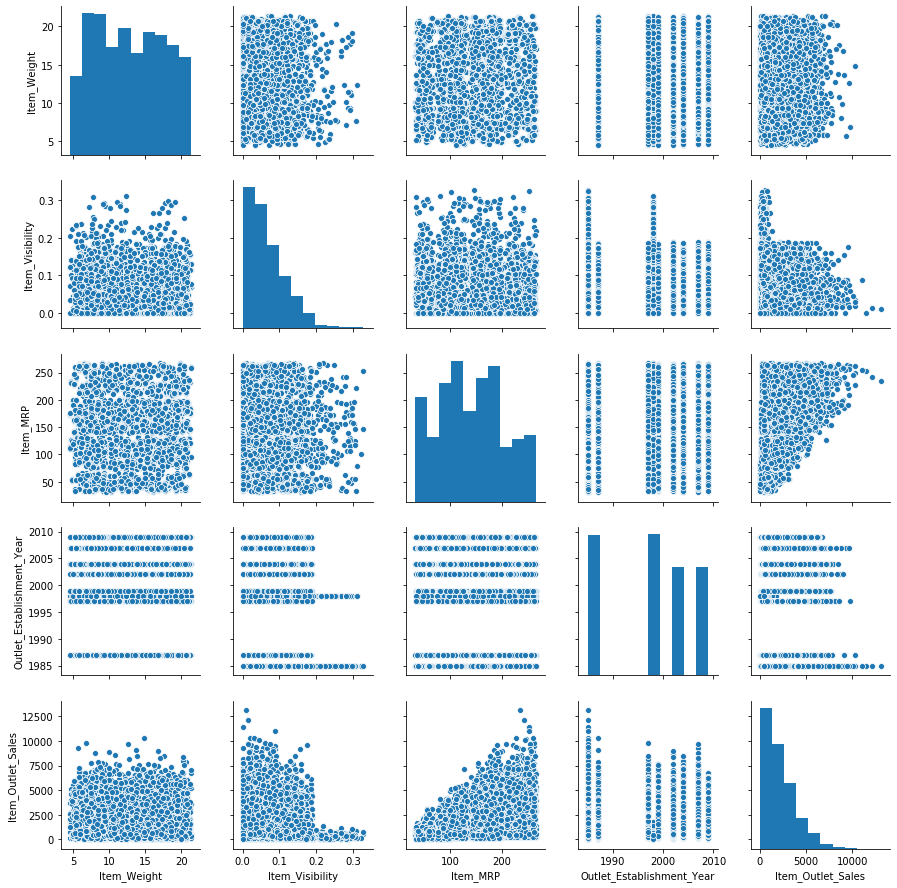

In [12]:
#pair plot
sns.pairplot(data)
plt.show()

In [13]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [14]:
#box plots
#columns=['Item_Weight', 'Item_Outlet_Sales']
#sns.boxplot('Item_Outlet_Sales','Item_Weight',data=data)
#ax.set_xlabel('')
#ax.set_ylabel(feat)

In [15]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
#preparation 

X=np.array(data.iloc[:,4])
#X=X.reshape(len(X),1)
#X=(X-np.mean(X))/np.std(X)
y=data.iloc[:,-1]

In [17]:
#set up the variabels for X  only when there is one column
X=X[:,np.newaxis]
m,n=X.shape
y=y[:,np.newaxis]


In [57]:

theta=np.zeros((n+1,1))

In [19]:
ones=np.ones((m,1))


In [20]:
X=np.hstack((ones,X))

In [21]:
print(theta.shape,X.shape,y.shape)

(2, 1) (8523, 2) (8523, 1)


In [22]:
def costfunction(theta,X,y):
    m=len(X)
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)
    

In [23]:
def gradientdescent(theta,X,y,iterations,alpha):
    m=len(X)
    for _ in range(iterations):
        temp =np.dot(X,theta)-y
        theta=theta-(alpha/2*m)*(np.dot(X.T,temp))
    return theta
        

In [24]:
def prediction(X,theta):
    return np.dot(X,theta)

In [58]:
costfunction(theta,X,y)

3834910.2913576914

In [55]:
alpha=0.000000000001
itera=10000
theta=np.zeros((n+1,1))
theta=gradientdescent(theta,X,y,itera,alpha)

In [56]:
print(theta)
costfunction(theta,X,y)

[[-0.57966302]
 [15.48776639]]


986904.8941371301

In [62]:
up=np.sum(np.power(y-np.dot(X,theta),2))
do=np.sum(np.power(y-np.mean(y),2))
(up/do)

2.634048539244958

In [60]:
np.mean(np.power(y-np.dot(X,theta),2))

7669820.582715383

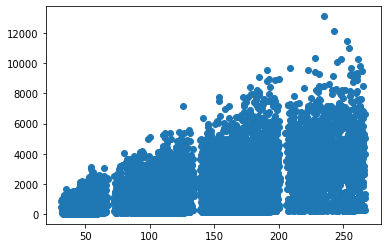

In [63]:
plt.scatter(data['Item_MRP'],data['Item_Outlet_Sales'])

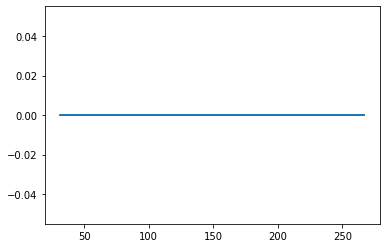

In [64]:
plt.plot(X[:,1],np.dot(X,theta))

In [32]:
X

array([[  1.    , 249.8092],
       [  1.    ,  48.2692],
       [  1.    , 141.618 ],
       ...,
       [  1.    ,  85.1224],
       [  1.    , 103.1332],
       [  1.    ,  75.467 ]])

In [33]:
pd.get_dummies(data)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,556.6088,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,343.5528,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7,NaN,0.127470,107.7622,1985,4022.7636,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,1076.5986,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,4710.5350,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
